## Forecasting Sales amount using Prophet

### Recall the data as same as previous notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime as dt
from prophet import Prophet
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [2]:
sales = pd.read_excel(r"C:\Users\HWLEE\Desktop\study\Project data\sales\Superstore.xlsx")
returns = pd.read_excel(r"C:\Users\HWLEE\Desktop\study\Project data\sales\return data.xlsx")

print(sales.head())
print(returns.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [5]:
df = sales.merge(returns, how='left', on='Order ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

I calculated the data based on days. 

In [6]:
# group by 'order date'
pr1 = df[['Order Date','Sales']]
pr1.sort_values('Order Date')
pr1 = pr1.groupby('Order Date').sum('Sales')
pr1 = pr1.reset_index()
pr1

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [7]:
# Change column name to ds and y
pr1.set_index('Order Date', inplace=True)
pred5 = pr1.reset_index()
df_ts= pred5[['Order Date','Sales']]
df_ts.columns = ['ds','y']

df_ts.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


Graph for daily trends

C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


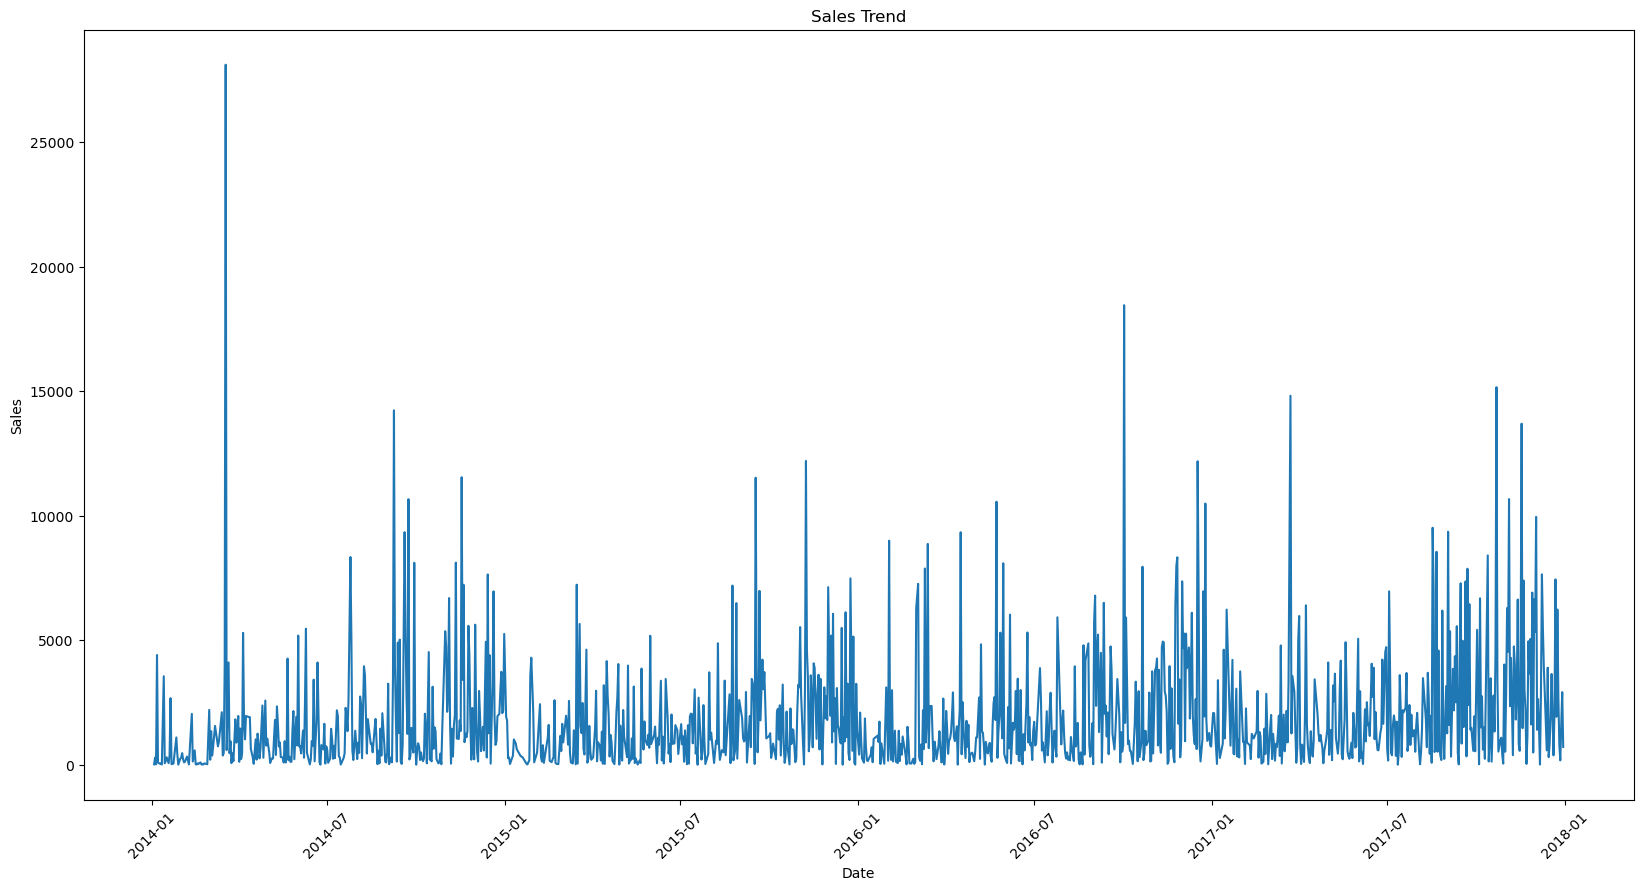

In [8]:
# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create the time series plot
sns.lineplot(x="ds", y="y", data=df_ts)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend')

# Show the plot
plt.show()

Calculate the gap between Ship date and order date


In [9]:

df['gap'] = df['Ship Date'] - df['Order Date']
df['gap'] = df['gap'].apply(lambda x: x.days)

Create Boolean with columns 'Category','Segment','Ship Mode', etc.


In [10]:

df = pd.get_dummies(df, columns = ['Category'])
df = pd.get_dummies(df, columns = ['Segment'])

In [11]:
df = pd.get_dummies(df, columns = ['Ship Mode'])


In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,City,State,Postal Code,...,Category_Furniture,Category_Office Supplies,Category_Technology,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,True,False,False,True,False,False,False,False,True,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,...,True,False,False,True,False,False,False,False,True,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,...,False,True,False,False,True,False,False,False,True,False
3,4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,True,False,False,True,False,False,False,False,False,True
4,5,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,TB-21400,Tom Boeckenhauer,United States,Miami,Florida,33180,...,True,False,False,True,False,False,False,False,True,False
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,True,False,False,True,False,False,False,False,False,True
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,False,False,True,True,False,False,False,False,False,True
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,DB-13060,Dave Brooks,United States,Costa Mesa,California,92627,...,False,True,False,True,False,False,False,False,False,True


In [13]:
df_nort = df[df['Returned'].isna()]
pr6 = df_nort[['Order Date','Sales','Quantity','Profit', 'gap', 'Discount',
               'Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office'
              , 'Ship Mode_First Class','Ship Mode_Same Day','Ship Mode_Second Class','Ship Mode_Standard Class']]
pr6.sort_values('Order Date')
pr6 = pr6.groupby('Order Date').sum('Sales')
pr6 = pr6.reset_index()
pr6

,Order Date,Sales,Quantity,Profit,gap,Discount,Category_Furniture,Category_Office Supplies,Category_Technology,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,2014-01-03,16.448,2,5.5512,4,0.2,0,1,0,1,0,0,0,0,0,1
1,2014-01-04,288.060,8,-65.9901,12,1.2,0,3,0,0,0,3,0,0,0,3
2,2014-01-05,19.536,3,4.8840,7,0.2,0,1,0,1,0,0,0,0,0,1
3,2014-01-06,4407.100,30,1358.0524,31,0.0,1,6,2,1,1,7,1,0,1,7
4,2014-01-07,87.158,10,-71.9621,10,1.4,1,1,0,2,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,2017-12-26,814.594,12,61.1202,16,0.9,0,4,0,1,2,1,0,1,0,3
1217,2017-12-27,177.636,6,-31.9742,0,0.6,0,1,1,0,2,0,0,2,0,0
1218,2017-12-28,1551.330,60,261.9980,84,3.6,5,11,1,6,8,3,1,0,2,14
1219,2017-12-29,2827.474,34,614.2918,38,0.4,5,4,1,8,2,0,1,0,5,4


In [14]:
pr6.describe()


,Order Date,Sales,Quantity,Profit,gap,Discount,Category_Furniture,Category_Office Supplies,Category_Technology,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
count,1221,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.00000,1221.000000
mean,2016-01-23 03:22:51.007371008,1733.576235,28.517609,215.532072,29.886159,1.184562,1.597052,4.547912,1.384930,3.902539,2.262899,1.364455,1.135135,0.392301,1.48321,4.519247
min,2014-01-03 00:00:00,2.025000,1.000000,-6266.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2015-01-09 00:00:00,323.190000,10.000000,6.600000,11.000000,0.200000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,2016-02-07 00:00:00,970.384000,23.000000,86.385600,23.000000,0.800000,1.000000,4.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.00000,3.000000
75%,2017-01-22 00:00:00,2202.834000,40.000000,287.272200,43.000000,1.800000,2.000000,7.000000,2.000000,6.000000,3.000000,2.000000,2.000000,0.000000,2.00000,7.000000
max,2017-12-30 00:00:00,26908.386000,144.000000,8738.797100,147.000000,7.900000,10.000000,25.000000,10.000000,24.000000,22.000000,13.000000,12.000000,11.000000,15.00000,28.000000
std,NaN,2205.821256,23.044164,666.412936,24.113991,1.193493,1.662940,3.749584,1.541524,3.802437,2.663753,2.102071,1.851606,1.114395,2.21894,4.084035


In [15]:
pr6 = pr6.reset_index()
pr6['ds'] = pd.to_datetime(pr6['Order Date'], format='%d-%m-%Y')
pr6['y'] = pr6['Sales']
pr6 

,index,Order Date,Sales,Quantity,Profit,gap,Discount,Category_Furniture,Category_Office Supplies,Category_Technology,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,ds,y
0,0,2014-01-03,16.448,2,5.5512,4,0.2,0,1,0,1,0,0,0,0,0,1,2014-01-03,16.448
1,1,2014-01-04,288.060,8,-65.9901,12,1.2,0,3,0,0,0,3,0,0,0,3,2014-01-04,288.060
2,2,2014-01-05,19.536,3,4.8840,7,0.2,0,1,0,1,0,0,0,0,0,1,2014-01-05,19.536
3,3,2014-01-06,4407.100,30,1358.0524,31,0.0,1,6,2,1,1,7,1,0,1,7,2014-01-06,4407.100
4,4,2014-01-07,87.158,10,-71.9621,10,1.4,1,1,0,2,0,0,0,0,0,2,2014-01-07,87.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1216,2017-12-26,814.594,12,61.1202,16,0.9,0,4,0,1,2,1,0,1,0,3,2017-12-26,814.594
1217,1217,2017-12-27,177.636,6,-31.9742,0,0.6,0,1,1,0,2,0,0,2,0,0,2017-12-27,177.636
1218,1218,2017-12-28,1551.330,60,261.9980,84,3.6,5,11,1,6,8,3,1,0,2,14,2017-12-28,1551.330
1219,1219,2017-12-29,2827.474,34,614.2918,38,0.4,5,4,1,8,2,0,1,0,5,4,2017-12-29,2827.474


C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HWLEE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

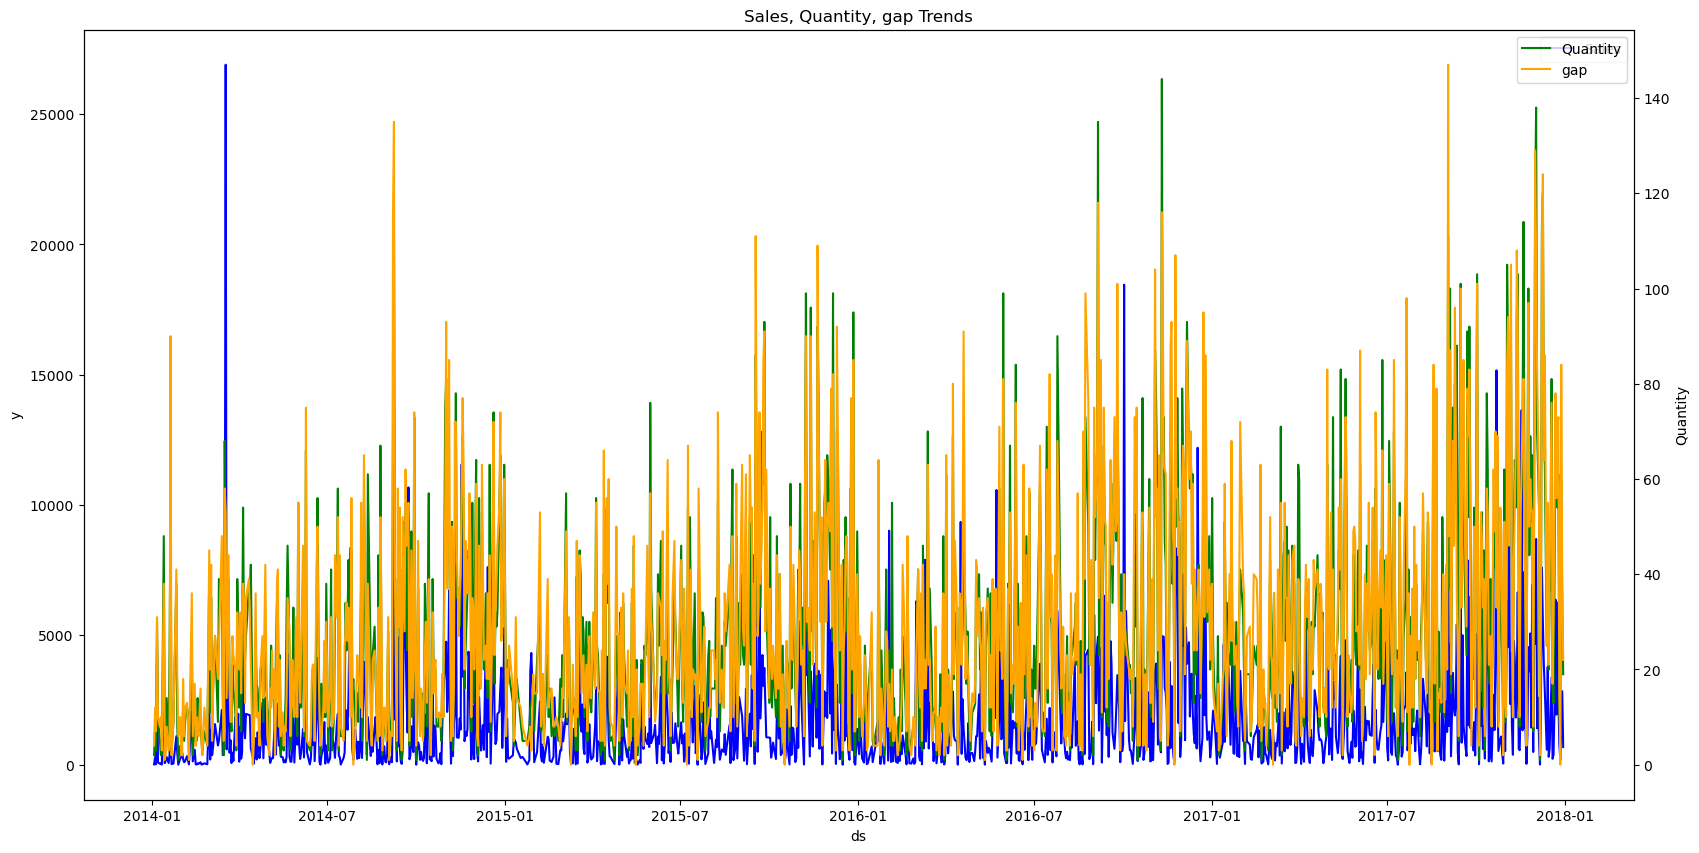

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create the time series plot 
sns.lineplot(x="ds", y="y", data=pr6, color='blue', label='Sales')

# Create Quantity on secondary y-axis
ax2 = plt.gca().twinx()
sns.lineplot(x="ds", y="Quantity", data=pr6, color='green', ax=ax2, label='Quantity')

# Plot gap on the secondary y-axis
sns.lineplot(x="ds", y="gap", data=pr6, color='orange', label='gap')

plt.xticks(rotation=45)
plt.title('Sales, Quantity, gap Trends')

plt.show()

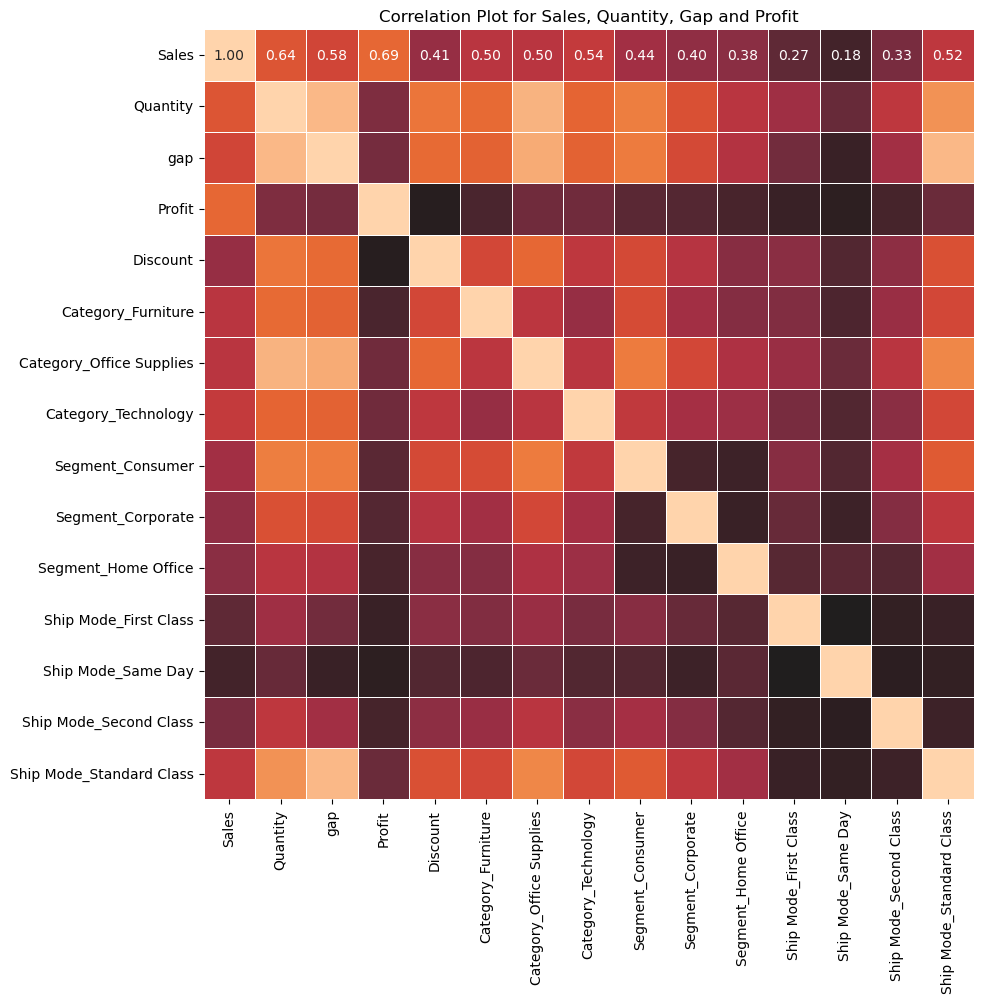

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_of_interest = ['Sales','Quantity', 'gap','Profit', 'Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office'
                      , 'Ship Mode_First Class','Ship Mode_Same Day','Ship Mode_Second Class','Ship Mode_Standard Class']
pr6_1 = pr6[columns_of_interest]

# Calculate the correlation matrix
corr = pr6_1.corr()

# Visualization with heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", center=0, square=True,
            linewidths=.5, cbar=False)  # Remove the color bar


plt.title('Correlation Plot for Sales, Quantity, Gap and Profit')
plt.show()

In [18]:
pr6['Profit'] = pr6['Profit'].apply(lambda x: 0 if x < 0 else x)


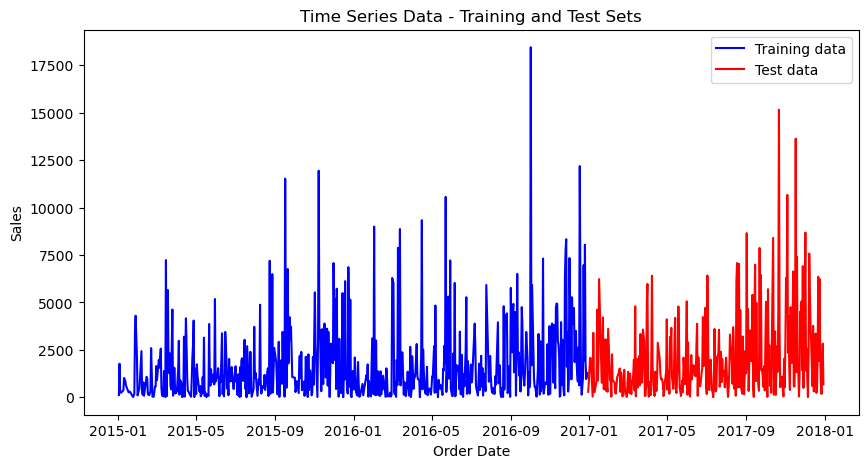

In [19]:
# Convert 'date' column to datetime
pr6['Order Date'] = pd.to_datetime(pr6['Order Date'], format='%d-%m-%Y')

# Calculate the index position for splitting (using recent 12 months)
split_date = pr6['Order Date'].max() - pd.DateOffset(months=12)
split_index = pr6[pr6['Order Date'] >= split_date].index[0]

start_date = '2015-01-01'
end_date = '2016-01-01'
# Split the dataset into training and test sets
train_pr6 = pr6[(pr6['Order Date'] < split_date) & (pr6['Order Date'] >= start_date)]  
test_pr6 = pr6.iloc[split_index:]

# Plot train and test datasets with different colors
plt.figure(figsize=(10, 5))
plt.plot(train_pr6['Order Date'], train_pr6['y'], color='blue', label='Training data')
plt.plot(test_pr6['Order Date'], test_pr6['y'], color='red', label='Test data')
plt.title('Time Series Data - Training and Test Sets')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [20]:
print(split_date)


2016-12-30 00:00:00


In [21]:
model2 = Prophet()
forecast = model2.fit(pr6)

19:31:42 - cmdstanpy - INFO - Chain [1] start processing
19:31:42 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future2 = model2.make_future_dataframe(periods=365)
forecast2 = model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1581,2018-12-26,1756.171750,-928.764903,4216.780511
1582,2018-12-27,2778.475008,148.040577,5478.828740
1583,2018-12-28,2987.447886,464.263965,5430.852920
1584,2018-12-29,2503.544778,-293.783765,5249.932289
1585,2018-12-30,2559.292993,-102.986204,5230.780794


C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


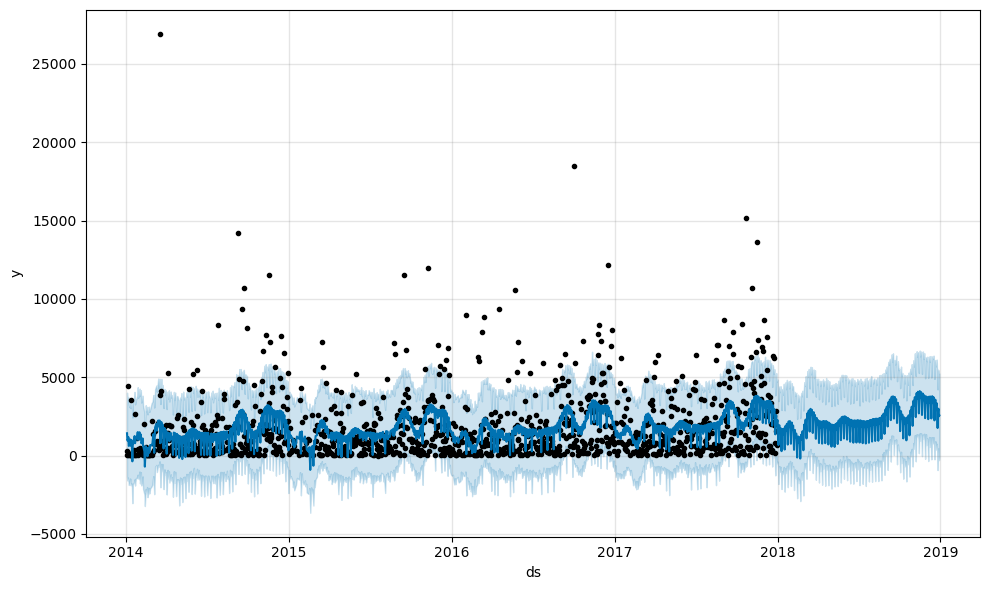

In [23]:
model2.plot(forecast2)
plt.show()

C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

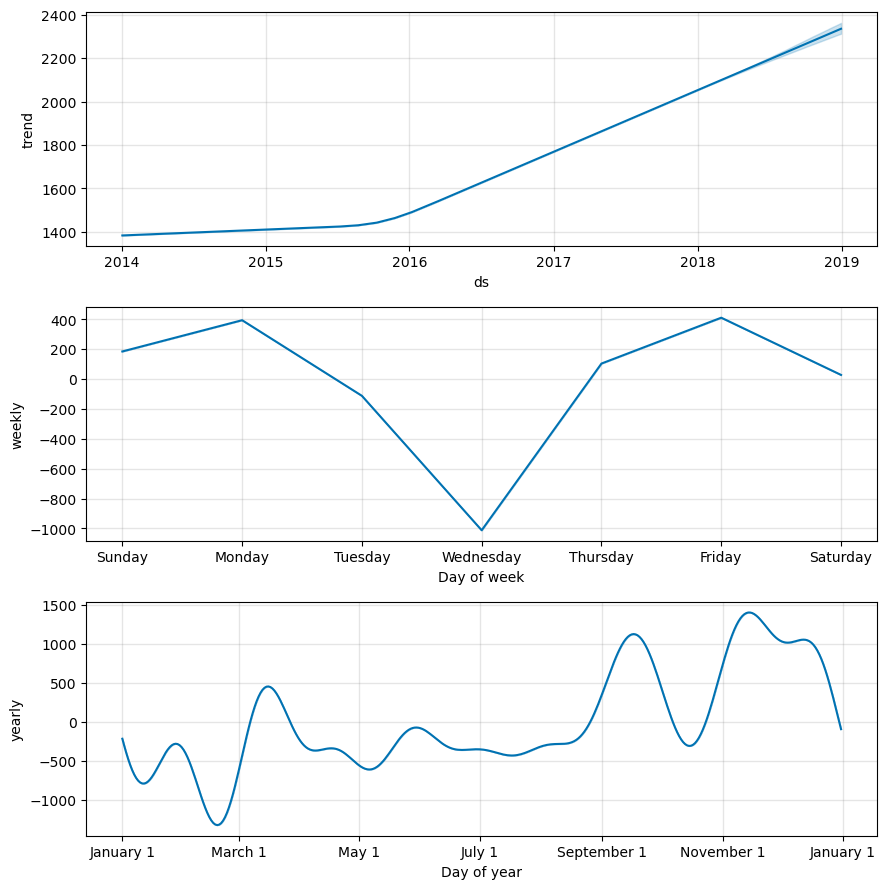

In [24]:
model2.plot_components(forecast2)
plt.show()

#### Modeling using 2017 Data


Use different kinds of factors to make the model accurate

In [25]:
model3 = Prophet()
model3.add_regressor('Profit')
model3.add_regressor('Quantity')
model3.add_regressor('Discount')
#model3.add_regressor('Category_Furniture')
model3.add_regressor('Category_Office Supplies')
#model3.add_regressor('Category_Technology')
#model3.add_regressor('Segment_Consumer')
model3.add_regressor('Segment_Corporate')
model3.add_regressor('Segment_Home Office')
#model3.add_regressor('Ship Mode_First Class')
#model3.add_regressor('Ship Mode_Same Day')
model3.add_regressor('Ship Mode_Second Class')
#model3.add_regressor('Ship Mode_Standard Class')
#model3.add_regressor('gap')
fc_train_pr6 = model3.fit(train_pr6)

19:31:44 - cmdstanpy - INFO - Chain [1] start processing
19:31:44 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future3 = model3.make_future_dataframe(periods=720)
future3.tail()

,ds
1312,2018-12-15
1313,2018-12-16
1314,2018-12-17
1315,2018-12-18
1316,2018-12-19


In [36]:
fc_train_pr6 = model3.predict(test_pr6)
fc_train_pr6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
318,2017-12-26,150.817657,-1098.939592,1238.993542
319,2017-12-27,266.377749,-969.635755,1503.239172
320,2017-12-28,2774.994712,1544.178545,3926.252551
321,2017-12-29,2831.008849,1667.759312,4012.736913
322,2017-12-30,628.417155,-564.717909,1825.896264


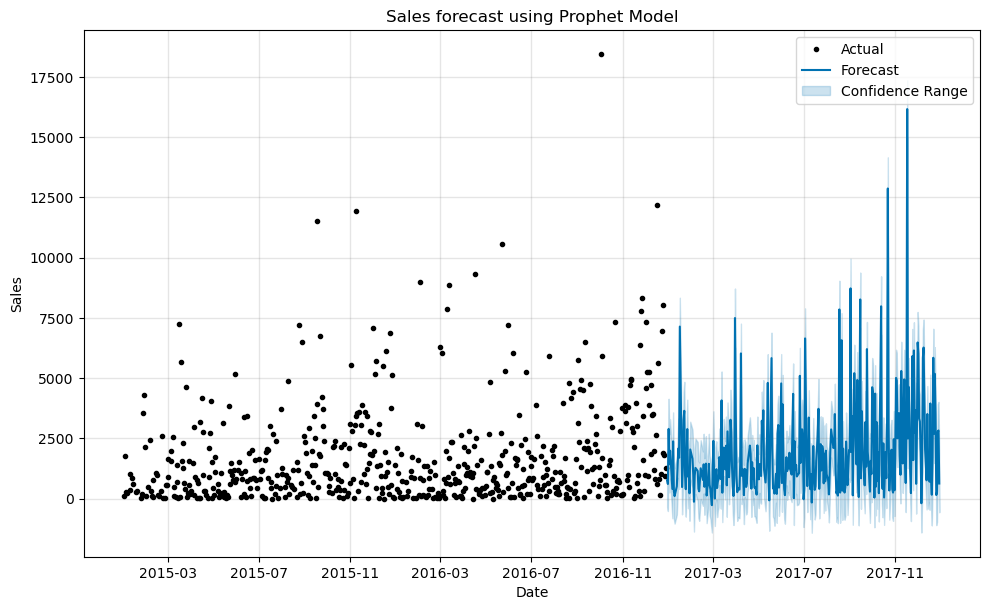

In [38]:
model3.plot(fc_train_pr6)

# Customize axis titles
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales forecast using Prophet Model')

# Add legend
plt.legend(['Actual', 'Forecast', 'Confidence Range'])


# Show the plot
plt.show()

Compare forecasted and actual

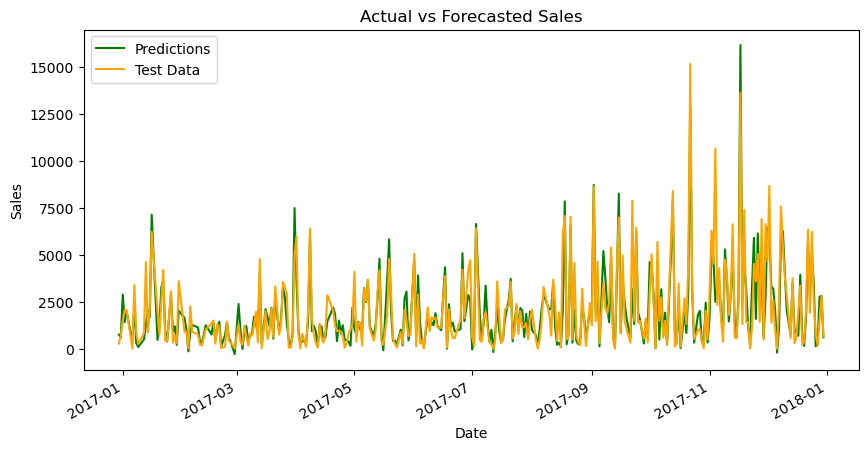

In [39]:
import matplotlib.pyplot as plt

# Generate the plot with adjusted figure size
fig, ax = plt.subplots(figsize=(10, 5))
fc_train_pr6.plot(x='ds', y='yhat', label='Predictions', color = 'green',legend=True, ax=ax)
test_pr6.plot(x='ds', y='y', label='Test Data', color = 'orange', legend=True, ax=ax)

# Customize axis titles and chart title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')

# Show the plot
plt.show()

Zoom in details and compare actual vs. forecasted

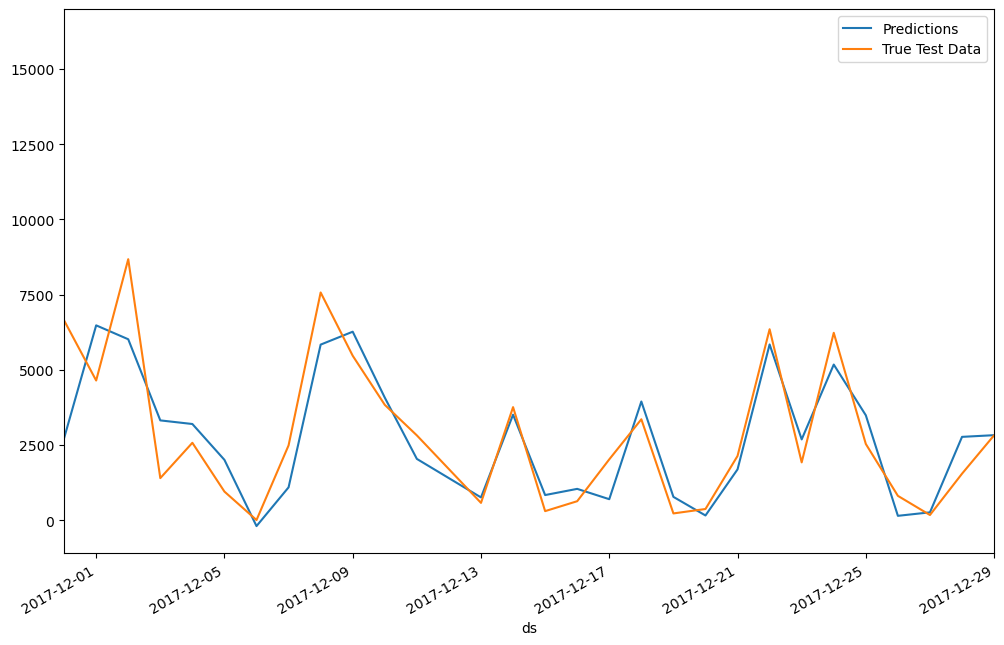

In [40]:
ax = fc_train_pr6.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test_pr6.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2017-11-30', '2017-12-29'));
plt.show()

Visualize trend, weekly and extra regression additive graphs

C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HWLEE\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


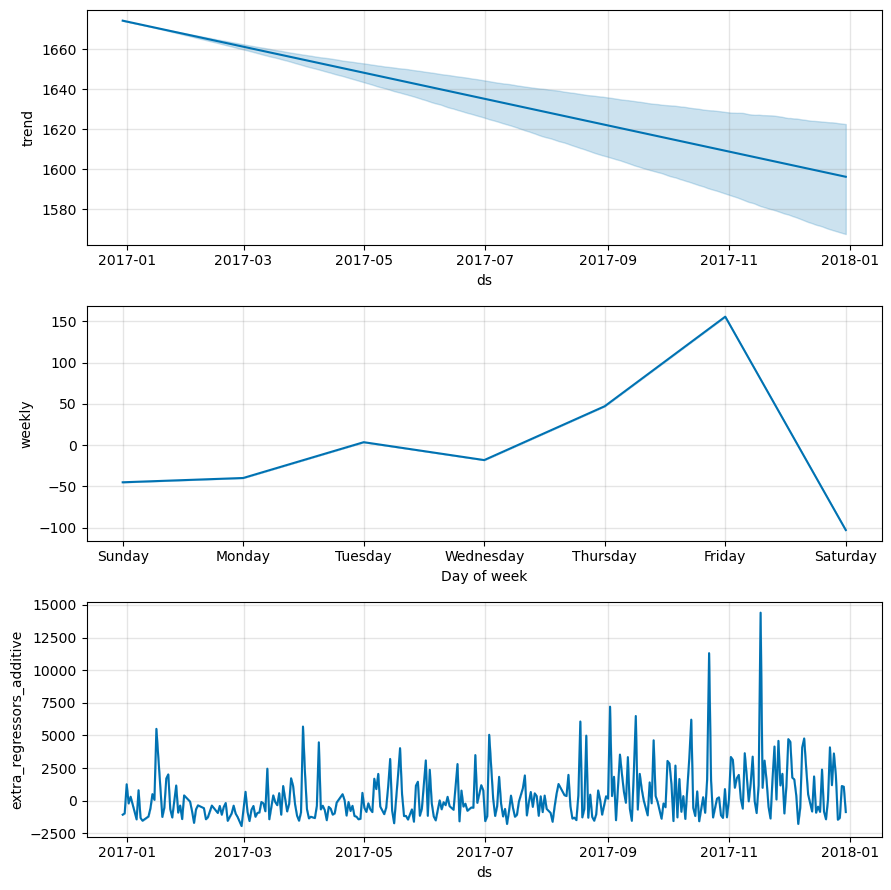

In [41]:
model3.plot_components(fc_train_pr6)
plt.show()

#### Evaluation using Root Mean Squared Error (RMSE) and MAPE


In [ ]:
RMSE

In [42]:
np.sqrt(mean_squared_error(y_true=test_pr6['y'],
                   y_pred=fc_train_pr6['yhat']))

1042.8362317427304

MAPE

In [33]:

from sklearn.metrics import mean_absolute_percentage_error
print(f"MAPE : {mean_absolute_percentage_error(test_pr6['y'], fc_train_pr6['yhat']):.3f}")

MAPE : 0.974
